# Hypothesis Testing

- NOTE: still feel not very clear with this section
- https://vitalflux.com/when-to-use-z-test-vs-t-test-differences-examples/
- https://youtu.be/ChLO7wwt7h0?si=8h8uSCAVVAuBtpD6

## Terms of Hypothesis Testing

- <big>p-value</big>
  - **Probability of observing as or more extreme (from the samples) effects**
    - **Given the Null hypothesis is True (for the population)**
  - When _`p-value` is less than `Significance Level`_ (e.g. 0.05)
    - Null is Rejected
    - Because, given Null is True
      - **Probaility of observing effect is so low, that it cannot support the claim of equal**
- <big>One-Sample t-test vs Two-Sample t-test</big>
  - One-Sample is to compare a single population value to a standard value
  - Two-Sample is to comapre between value of population A and value of population B
  - They use different formulas to calculate the t-score
  - ...
- <big>Paired t-test</big>
  - To Compare a single population before and after some experimental interventions 
    - I.e. comapre a single population at two different points in time
  - ...
- <big>One-tailed Test vs Two-tailed Test</big>
  - To divide the signifiance level into two parts or just one part
  - E.g. with Significance Level = 0.05 (alpha)
    - Two-tailed means lower-part is 0.025, upper-part is also 0.025
    - One-tailed means either the lower-part is 0.05 or upper-part is 0.05 (only one of the two)
  - This is set with the Alternative hypothesis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from scipy import stats
sns.set()

## Steps for Testing

1. **State the Null and Alternative hypothesis**
   - Null:
     - assumed to be True
     - observed event happened only by chance and no effect from treatment
   - Alternative:
     - observed event does not happen by chance, having effect from treatment
   - E.g. Coin Toss 
2. **Choose a significance level**
   - I.e. alpha, usually at 0.05 or lower
   - Probability of falsely rejecting the null hypothesis when it's True, (False Positive)
   - Risk of getting False Positive result on the test
3. **Find the `p-value`**
   - Probability of observing results "as or more" extreme than those observed
     - Given the Null hypothesis is True
   - E.g. a p-value of 0.0237 (2.37%)
     - Given the null is True (no difference) 
     - The probability of observing the effect (or more extreme) from the sample is only 2.37%
4. **"Reject" or "Fail to reject" the null hypothesis**
   - Saying "Faile to Reject" instead of saying "accept", because "accept" implies certainty
     - But probability is not about certainty

## P-Value

- What is p-value
  - **Given the Null hypothesis is True**
    - **<mark>Probability of observing a difference from the samples "as or more extreme"</mark>**
  - **Probability to obtain the effect observed from the given sample (or more extreme effect)**
    - **Given the Null hypothesis is True for the populations**
  - So given a p-value of 0.03 (3%):
    - Only 3% probability to observe as or more extreme the difference
    - Very low probabily
- What is Significance Level"
  - **Given Null hypothesis is True**
    - **<mark>Probability of rejecting the Null hypothesis (i.e. conducting a Type I Error)</mark>**
  - Or, chance (in percentage) that you're willing to accept to be wrong when rejecting the Null hypothesis
    - E.g. with 0.05, 5% chance to be wrong when rejecting Null
  - Also called "α", "alpha" or "False Positive Rate"
  - Usually at 0.05 or 0.01
- IF "P-value" smaller than "Signifiance Level (0.05)"
  - The probability of observing a difference in the results (alternative) is less than 5%
  - Willing to accept 5% probability to conduct a Type I Error of False Positive
  - THEN you can "Reject Null Hypothesis"

### Calculations

- With **Test Statistic**
  - Under the null hypothesis (no difference)
    - A value that shows how closely the observed data matches the distribution expected
- **Conducting Z-test**, so the Test Statistic is **"Z-score"**
  - Measure of how many standard deviations the observed data is below or above the population mean
  - I.e. where the value lies on a normal distribution
  - Formula for Z-score with One Sample Test:
    - (`Sample Mean` - `Population Mean`), divided by (`Population std` / `square root of Sample size`)
    - Require known Population Mean and and Standard Deviation
  - Formula for Z-score with Two Sample Test on Proportions:
    - ...
- **Conduct t-est**, i.e. **t-score**
  - Formula for t-score with Two Sample Test on Means:
    - (`Sample 1 Mean` - `Sample 2 Mean`), divided by
       - Squre Root of (`Sample 1 Std Squared` / `Sample 1 Size` +  `Sample 2 Std Squared` / `Sample 2 Size`)
- Getting `p-value`
  - Area under the curve is `p-value`
  - Left-tailed, Right-tailed or Two-tailed tests
  
      
> https://www.coursera.org/learn/the-power-of-statistics/lecture/Kv9dl/one-sample-test-for-means  
> https://www.coursera.org/learn/the-power-of-statistics/lecture/PmaS3/two-sample-tests-proportions  

## Type of Errors

- <big>**Type I Error**</big>
  - **False Positive**
    - Falsely classified as positive, while true label is negative (classification problem)
    - **<mark>Falsely considered Alternative as True (positive)</mark>, while it should be false**; and rejected null
  - Reject the null hypothesis when it’s actually true
  - significance level, or **alpha (α)**, represents the probability of making a Type I error
  - _NOTE: "I" and then "II", same as "Positive" then "Negative"_
  - To Minimize
    - Choosing a lower significance level, e.g. 1%
- <big>**Type II Error**</big>
  - **False Negative**
    - Falsely classified as negative, while true label is positive (classification problem)
    - **<mark>Falsely considered Alternative as False (negative)</mark>, while it should be true**; and did not reject null
  - Fail to reject the null hypothesis when it’s actually false 
  - Pobability of making a Type II error is called **beta (β)**
    - beta is related to the power of a hypothesis test (power = 1- β)
    - **Power** refers to the likelihood that a test can correctly detect a real effect when there is one
  - To Minimize
    - ensuring your test has enough power, by increasing sample size or significance level
- https://www.simplypsychology.org/type_i_and_type_ii_errors.html

## One & Two Sample Test


### One-Sample Test

> Testing of a population to a standard value, e.g. Data Scientist average income to All Population's average income

- TO test a population parameter is equal to a specific value or not
  - E.g. average sales revenue (of samples) equals to a "50,000" or not
  - E.g. stock portfolio average rate equals to 56% or not
- **One Sample Z-test**
  - Assumptions
    - Data is random _sample from a normaly distributed population_
    - Known _population standard deviation_ 
      - (usually this is unknown, so t-test is often used)
- **One Sample t-test**
  - Assumptions
    - Observations are independent to each other
    - Data are randomly sampled from the target population
    - The population distribution is approximately normal
  - Steps in conducting a test
    1. State the null hypothesis and the alternative hypothesis
       - Null: population means equals to the observed value
       - Alt: "not equal to",  "less than", or "greater than"
    2. Choose a significance level
       - Probability of rejecting the null when it is true (False Positive)
    3. Find the `p-value`
       - Using t-score with the one-sample formula
       - $$t = \frac{\overline{x}-\mu{}_{0}}{s_{\overline{x}}}$$
    4. Reject or fail to reject the null hypothesis

### Two-Sample Test

> Testing of the difference between Population A and Population B, e.g. Data Scientist aveage income vs. Software Engineer average income

- **Two Sample t-test**
  - To Test if two population means (parameters) are equal to each other or not
    - E.g. in A/B Testing, Group A vs Group B
  - Hypotheses
    ... 
  - Assumptions
    - Two samples are independent of each other
    - Samples are drawn randomly from a normally distributed population
    - Population standard deviation is _Unknown_ (thus using t-test)
  - P-value
- **Two Sample Z-test**
  - To test if two population **proportions** are equal to each other or not
    - _NOTE: t-test DO NOT are not applicable to proportions_
    - E.g. Side effects of medicine between two trial groups
    - E.g. Support of percentage for a new law in two districts
    - E.g. Proportion of satisfication to work environment in two different locations
  - Hypotheses
    - Null: no difference between the two proportions
    - Alternative: there is difference between the two proportions
  - Assumptions
    - ...
  - P-value
    - Z-Statistic for proportions
      - (Difference between two sample proportions), divided by 
      - Square Root of (pooled proportion times (1 - pooled proportion) times (1/sample 1 size + 1/ sample 2 size))
      - Pooled Proportion
        - Weighted average of the proportions

### Other

- <font color='crimson'>TODO: add hypothesis testing to your data analyst arsenal</font>
  - https://mverbakel.github.io/2021-02-13/two-sample-proportions

In [3]:
df = px.data.gapminder()
print(df.shape)
df.head()

(1704, 8)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [4]:
(
    df.groupby("continent").gdpPercap.mean()
    .rename({"gdpPercap": "GDP_per_capita"}).reset_index()
)

,continent,gdpPercap
0,Africa,2193.754578
1,Americas,7136.110356
2,Asia,7902.150428
3,Europe,14469.475533
4,Oceania,18621.609223


> **Q: Is the difference of average GDP between Asias and Americas statistically significant?**

- $H_0$: There is no difference in the mean GDP between America countries and Asia countries
- $H_A$: There is a difference in the mean GDP between America countries and Asia countries

We're comparing two sample means between two independent samples, therefore will be a **"Two Sample t-test"**

In [5]:
significance_level = 0.05
significance_level

0.05

In [6]:
# t-test with two samples
tmp = stats.ttest_ind(
    a=df.query("continent == 'Americas'").gdpPercap,
    b=df.query("continent == 'Asia'").gdpPercap,
    equal_var=False,
)
tmp

TtestResult(statistic=-0.9616471732473416, pvalue=0.3366254286406626, df=583.1581429498881)

In [7]:
tmp.pvalue < significance_level

False

Test Result:

- Since p-value is not smaller than the significance level, we **Failed to reject the null hypothesis**
  - I.e. there is no difference between mean GDP of Asias and Americas
- NOTE: we're actually testing on whole data available, but if subet on only some years, that could be a sample of the GDP

## Chi-Squared Test

> Chi-Squared Tests (χ²)

- **Examine the relationship between "Categorical" Variables**
- Hypothesis Testing with Categorical Variables
- Check significance whether one or more categorical variables follow expected distributions
- https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/Zbmic/hypothesis-testing-with-chi-squared
- https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/supplement/DMwWu/chi-squared-tests-goodness-of-fit-versus-independence

### Goodness of Fit test

- Whether an observed categorical variable follows an expected distribution
- Hypotheses
  - NULL: The categorical variable does follow the expected distribution
  - ALT: The categorical variable does NOT follow the expected distribution
- E.g. "the number of website visitors to be the same for each day of the week"
  1. Identify the Null and Alternative Hypotheses
     - NULL: the number of website visitors is equal on any given day
     - ALT: the number of website visitors is not equal across the days of the week
  2. Calculate the chi-square test statistic (𝛘2)
     - Sum of
       - Squared (`observed` - `expected`), divided by `expected`
  3. Calculate the p-value
     - `stats.chisquare(f_obs = Observations, f_exp = Expectations)`
  4. Make a conclusion

### Test for Independence

- Whether or not two categorical variables are associated with each other
- Hypotheses
  - NULL: the two categorical variables are independent.
  - ALT: the two categorical variables are NOT independent
- E.g. "if the device used to visit your clothing store (Mac or PC) is independent from the visitor’s membership status (Member or Guest)"
  1. Hypotheses
     - H0: The type of device a website visitor uses to visit the website is independent of the visitor’s membership status.
     - Ha: The type of device a website visitor uses to visit the website is not independent of the visitor’s membership status.
  2. Test Statistics
     - TODO: add it and why it is defined like that
  3. p-value
     - `stats.contingency.chi2_contingency(Observations)`

## ANOVA

> ANONA, Analysis of Variance

- **Examine the relationship between "Categorical" and "Continuous" Variables**
- Test the difference of means between three or more groups
  - Further extension from "t-test" (test beween means of two groups)
- Unlike Regression Test, which helps understand **"How X impact y"**
  - ANOVA allows zooming on the relationship between variables in a pari-wise fashion

### One-Way ANOVA

- One-way ANOVA
  - Compare the means of one Continuous `y` based on three or more of **another categorical variable**
  - E.g. Is "Lifespan" (`y`) of butterflies related to "Specises" (categorical `X1`) of 3 types
- Hypotheses
  - Null: Mean Lifespan is not different between 3 types, i.e. $\mu_a$ = $\mu_b$ = $\mu_c$
    - I.e. the means of each group equals to each other 
  - Alternative: Mean Lifespan is NOT all equal, i.e. NOT $\mu_a$ = $\mu_b$ = $\mu_c$
    - I.e. only one mean lifespan different is enough to reject the null
  
### Two-Way ANOVA

- Two-way ANOVA
  - Compare the means of one Continuous y based on three or more groups of **other two categorical variables**
  - E.g. Is "Lifespan" (`y`) related to "Specises" (categorical `X1`) and "Size" (categorical `X2`) ? 
- 3 Hypotheses
  - Test on Species
    - Null: No difference between 3 means of lifespan by Species
    - Alternative: There is difference between 3 means of lifespan by Species
  - Test on Size
    - Null: No difference between 3 means of lifespan by Size
    - Alternative: No difference between 3 means of lifespan by Size
  - Test on **Interactions** of above two
    - Null: Effect of Specises on Lifespan is independent of Size, and vice versa
    - Alternative: There's an interaction effect between Size and Specises on Lifespan

### Others

- **ANCOVA, Analysis of CoVariance**
  - Statistical techniques that 
    - test the difference of means between three or more groups
    - controlling for the effects of **"covariates"** (i.e. variables irrelevant to your test)
  - E.g. Book Sales as `y`, and Book Genre as `X`, with Publication Year as `Covariate`
  - Hypotheses
    - Null: Book Sales are equal across all Book Genre, regardless the Publication Year
    - Alternative: Book Sales are NOT equal across all Book Genre, regardless the Publication Year
  - Compare with Linear Regression
    - ANCOVA not focus on the covariates, but Regression is interested in all of the independent variables (`X`)
    - ANCOVA focus on the Categorical `X`, while Regression is more on predicting `y`
- **MANOVA, Multivariate Analysis of Variance**
  - Compare how **two or more continuous dependent variables (`y`)**
    - vary according to categorical `X` variables
  - One-way MANOVA
    - Continuous dependent variables vs "one" categorical X variable
  - Two-way MANOVA
    - Continuous dependent variables vs "two" categorical X variables
  - E.g. Book Sales and Book Profit as continuous dependent variables,
    - and Book Genre as the categorical independent variable
  - Hypotheses
    - Nulls
      - Mean Book Sales is the same for each Book Genre
      - Mean Book Profit is the same for each Book Genre
    - Alternatives
      - Mean Book Sales is NOT the same for each Book Genre
      - Mean Book Profit is NOT the same for each Book Genre
      - (any two different will result in rejecting the null)
- MANCOVA
  - Compare how **two or more continuous dependent variables (`y`)**
    - vary according to categorical `X` variables,
    - while controlling for the effect of covariates
  - E.g. Book Sales and Book Profit as continuous dependent variables,
    - and Book Genre as the categorical independent variable
    - but control for the author's popularity, "Author N Followers"
  - Hypotheses
    - Null: Book Sales are Book Profit equal across all Book Genre,
      - regardless Author N Followers
    - Alternative: Book Sales are Book Profit NOT equal across all Book Genre,
      - regardless Author N Followers
    - Alternative: Book Sales are NOT equal across all Book Genre, regardless the Publication Year
- https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/IuRtP/more-dependent-variables-manova-and-mancova


### Test on Diamonds
- One-Way ANOVA
  - Relationship between Diamond "Price" and "Color"
- Two-Way ANOVA
  - Relationship between Diamond "Price" and "Color", "Cut" and their interactions

In [50]:
import math

from statsmodels.regression.linear_model import OLS
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
from statsmodels.stats.anova import anova_lm
# https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html
# Anova table for one or more fitted linear models.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
# Calculate all pairwise comparisons with TukeyHSD confidence intervals

#### One-Way & Post-hoc

In [51]:
# Subset on the diamonds dataset for ANOVA 1-way: 1 continuous y & 1 categorical X
df = (
    sns.load_dataset("diamonds")[["color", "price"]]
    .query('color.isin(["E","F","H","D","I"])')
    .assign(
        color=lambda d: d.color.cat.remove_categories(["G", "J"]),
        log_price=lambda d: d.price.map(math.log),
    ).reset_index(drop=True)
)
df.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


In [52]:
df.describe().T
# Take log of the price to limit the difference between min and max
# Allowing better visualisation and modelling

,count,mean,std,min,25%,50%,75%,max
price,39840.0,3815.956225,3918.949175,326.000000,942.000000,2370.000000,5067.000000,18823.000000
log_price,39840.0,7.760653,1.004401,5.786897,6.848005,7.770645,8.530504,9.842835


> Examine the relationship between y and X

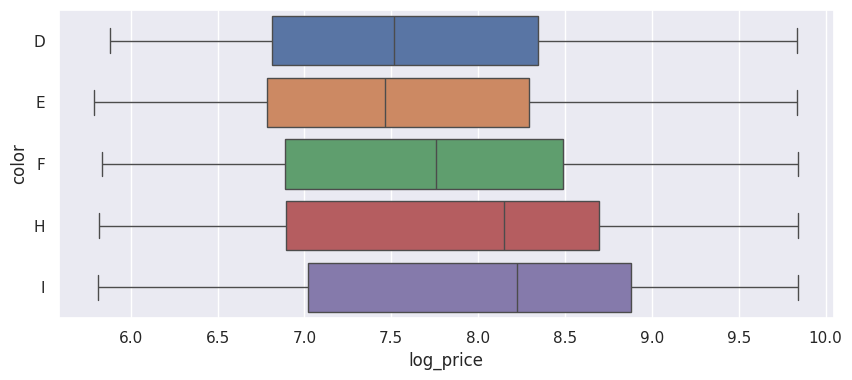

In [53]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(x=df.log_price, y=df.color, hue=df.color, ax=ax)
fig.show()

- A lot of overlap in the distribution of `log_price` for each color of diamond
- But we can't tell yet if they are statistically significantly different
  - So using the ANOVA test to uncover the relationship

> Regression Test

In [54]:
formula = "log_price ~ C(color)" # C for categorical variable

model = OLS.from_formula(formula, data=df).fit()
model

In [55]:
# print(model.summary())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.61e-225
Time:                        08:39:25   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.421      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.394      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.240      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.579      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.479      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.992   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.881
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Regression Test summary shows the color grades' associated `beta` coefficients all have a `p-value` of less than 0.05
  - (check the `P>|t|` column).
- But we can't be sure if there is a significant price difference between the various color grades
- This is where one-way ANOVA comes in


> ANOVA Test with Regression model

- $H_0: price_D=price_E=price_F=price_H=price_I$
  - There is no difference in the price of diamonds based on color grade.
- $H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$
  - There is a difference in the price of diamonds based on color grade.
- References
  - https://stats.stackexchange.com/questions/20452/how-to-interpret-type-i-type-ii-and-type-iii-anova-and-manova
  - ...

In [56]:
model

In [57]:
anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [58]:
anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.690290,260.422572,264.987395,3.609774e-225
Residual,39835.0,39148.779822,0.982773,NaN,NaN


In [59]:
anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.804852,1.0,399956.684283,0.000000e+00
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


We use the `anova_lm()` function from the `statsmodels.stats` package. As noted previously, the function requires a fitted regression model, and for us to specify the type of ANOVA: 1, 2, or 3. You can review the [statsmodels documentation](https://www.statsmodels.org/dev/generated/statsmodels.stats.anova.anova_lm.html) to learn more, as well as to [this article](https://www.r-bloggers.com/2011/03/anova-%e2%80%93-type-iiiiii-ss-explained/) and [this explanation on StackExchange](https://stats.stackexchange.com/questions/20452/how-to-interpret-type-i-type-ii-and-type-iii-anova-and-manova). Since the p-value (column `PR(>F)`) is very small, we can reject the null hypothesis that the mean of the price is the same for all diamond color grades. 

**Technical note:** The type of an ANOVA and the number of ways of an ANOVA are two distinct concepts: "type" (`typ` in `statsmodels.stats.anova.anova_lm()`) refers to how the sums of squares (these quantities are the building blocks for ANOVA) are calculated, while "K-way" means that there are K categorical factors in the analysis.

> Post-hoc Test

The `endog` variable specifies which variable is being compared across groups, which is `log_price` in this case. Then the `groups` variables indicates which variable holds the groups we're comparing, which is `color`. `alpha` tells the function the significance or confidence level, which we'll set to `0.05`. We'll aim for the typical 95% confidence level.

In [62]:
tukey_oneway = pairwise_tukeyhsd(endog = df["log_price"], groups = df["color"], alpha = 0.05)
tukey_oneway

In [63]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


Each row represents a pariwise comparison between the prices of two diamond color grades. The `reject` column tells us which null hypotheses we can reject. Based on the values in that column, we can reject each null hypothesis, except when comparing D and E color diamonds. We cannot reject the null hypothesis that the diamond price of D and E color diamonds are the same.

- Test 1: D vs. E
  - $H_0: price_D=price_E$
    - The price of D and E color grade diamonds are the same.
  - $H_1: price_D \neq price_E$
    - The price of D and E color grade diamonds are not the same.
  - Result: We *cannot* reject the null hypothesis that the price of D and E color grade diamonds are the same
- Test 2: D vs. F
  - $H_0: price_D=price_F$
    - The price of D and F color grade diamonds are the same.
  - $H_1: price_D \neq price_F$
    - The price of D and F color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of D and F color grade diamonds are the same.
- Test 3: D vs. H
  - $H_0: price_D=price_H$
    - The price of D and H color grade diamonds are the same.
  - $H_1: price_D \neq price_H$
    - The price of D and H color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of D and H color grade diamonds are the same.
- Test 4: D vs. I
  - $H_0: price_D=price_I$
    - The price of D and I color grade diamonds are the same.
  - $H_1: price_D \neq price_I$
    - The price of D and I color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of D and I color grade diamonds are the same.
- Test 5: E vs. F
  - $H_0: price_E=price_F$
    - The price of E and F color grade diamonds are the same.
  - $H_1: price_E \neq price_F$
    - The price of E and F color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of E and F color grade diamonds are the same.
- Test 6: E vs. H
  - $H_0: price_E=price_H$
    - The price of E and H color grade diamonds are the same.
  - $H_1: price_E \neq price_H$
    - The price of E and H color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of E and H color grade diamonds are the same.

- Test 7: E vs. I
  - $H_0: price_E=price_I$
    - The price of E and I color grade diamonds are the same.
  - $H_1: price_E \neq price_I$
    - The price of E and I color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of E and I color grade diamonds are the same.
- Test 8: F vs. H
  - $H_0: price_F=price_H$
    - The price of F and H color grade diamonds are the same.
  - $H_1: price_F \neq price_H$
    - The price of F and H color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of F and H color grade diamonds are the same.
- Test 9: F vs. I
  - $H_0: price_F=price_I$
    - The price of F and I color grade diamonds are the same.
  - $H_1: price_F \neq price_I$
    - The price of F and I color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of F and I color grade diamonds are the same.
- Test 10: H vs. I
  - $H_0: price_H=price_I$
    - The price of H and I color grade diamonds are the same.
  - $H_1: price_H \neq price_I$
    - The price of H and I color grade diamonds are not the same.
  - Result: We *can* reject the null hypothesis that the price of H and I color grade diamonds are the same.

#### Two-Way

In [41]:
# Subset on the diamonds dataset for ANOVA 1-way: 1 continuous y & 1 categorical X
df = (
    sns.load_dataset("diamonds")[["color", "cut", "price"]]
    .query('color.isin(["E","F","H","D","I"])')
    .query('cut.isin(["Ideal","Premium","Very Good"])')
    .assign(
        color=lambda d: d.color.cat.remove_categories(["G", "J"]),
        cut=lambda d: d.cut.cat.remove_categories(["Good", "Fair"]),
        log_price=lambda d: d.price.map(math.log),
    ).reset_index(drop=True)
)
df.head()

,color,cut,price,log_price
0,E,Ideal,326,5.786897
1,E,Premium,326,5.786897
2,I,Premium,334,5.811141
3,I,Very Good,336,5.817111
4,H,Very Good,337,5.820083


> Regression Test

In [43]:
formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)"

model = OLS.from_formula(formula, data=df).fit()
model

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:07:22   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.166      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.775      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.564      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.888   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.556
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Based on the model summary table, many of the color grades' and cuts' associated beta coefficients have a p-value of less than 0.05 (check the `P>|t|` column). Additionally, some of the interactions also seem statistically signifcant. We'll use a two-way ANOVA to examine further the relationships between price and the two categories of color grade and cut.

> ANOVA Test

First, we have to state our three pairs of null and alternative hypotheses:

- On Color
  - Null Hypothesis (Color)
    - $H_0: price_D=price_E=price_F=price_H=price_I$
    - There is no difference in the price of diamonds based on color.
  - Alternative Hypothesis (Color)
    - $H_1: \text{Not } price_D=price_E=price_F=price_H=price_I$
    - There is a difference in the price of diamonds based on color.
- On Cut
  - Null Hypothesis (Cut)
    - $H_0: price_{Ideal}=price_{Premium}=price_{Very \space Good}$
    - There is no difference in the price of diamonds based on cut.
  - Alternative Hypothesis (Cut)
    - $H_1: \text{Not } price_{Ideal}=price_{Premium}=price_{Very \space Good}$
    - There is a difference in the price of diamonds based on cut.
- On Interaction of Color and Cut
  - Null Hypothesis (Interaction)
    - $H_0: \text{The effect of color on diamond price is independent of the cut, and vice versa.}$
  - Alternative Hypothesis (Interaction)
    - $H_1: \text{There is an interaction effect between color and cut on diamond price.}$

In [46]:
anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.195814,244.298954,250.021037,3.747388e-212
C(cut),2.0,630.641441,315.320721,322.706309,1.348511e-139
C(color):C(cut),8.0,27.478611,3.434826,3.515279,4.531734e-04
Residual,34920.0,34120.806577,0.977114,NaN,NaN


In [45]:
anova_lm(model, typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


In [47]:
anova_lm(model, typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.043681,1.0,161268.910012,0.000000e+00
C(color),319.145817,4.0,81.655250,4.134649e-69
C(cut),100.144107,2.0,51.244864,5.987341e-23
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


- Since all of the p-values (column `PR(>F)`) are very small, we can reject all three null hypotheses.

## Test by Type of Variables

## References

- https://libguides.library.kent.edu/SPSS/OneSampletTest
- https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/
- https://towardsdatascience.com/how-to-know-which-statistical-test-to-use-for-hypothesis-testing-744c91685a5d